In [53]:
from langgraph.graph import StateGraph, START, END
import random
from typing import TypedDict, List

In [54]:
class AgentState(TypedDict):
    name: str
    thinkingNumber: int
    hint: str
    guess: int
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
      

In [55]:
def setup_node(state:AgentState) -> AgentState:
    """setup the thinking number between lower and upper bound"""
    state["thinkingNumber"] = random.randint(state["lower_bound"],state["upper_bound"])
    
    print(f"Welcome {state['name']} I am thinking of a number between {state['lower_bound']} and {state['upper_bound']}")
    
    return state

def guesses_node(state:AgentState) -> AgentState:
    """Generate a random guess between bounds"""
    state["guess"] = random.randint(state["lower_bound"],state["upper_bound"])
    state["guesses"].append(state["guess"])
    state["attempts"] += 1
    
    return state

def should_continue(state:AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["attempts"] < 7 and state["thinkingNumber"] != state["guess"]:
        print("entering loop: ", state["attempts"])
        return "loop" ## Continue looping
    
    elif state["attempts"] == 7:
        print("GAME OVER: You have reached the maximum number of attempts")
        return "exit"
    
    elif state["thinkingNumber"] == state["guess"]:
        return "exit"
    
    else:
        return "exit" # Exit the loop
    
def hint_node(state:AgentState) -> AgentState:
    """Give a hint based on the guesses"""
    if state["guess"] == state["thinkingNumber"]:
        state["hint"] = "You guessed it!"
        
        print(f"Congratulations {state['name']} you guessed the number {state['thinkingNumber']} in {state['attempts']} attempts")
    elif state["guess"] < state["thinkingNumber"]:
        state["hint"] = "Too low!"
        print(f"The number is higher than {state['guess']}")
    else:
        state["hint"] = "Too high!"
        print(f"The number is lower than {state['guess']}")
    return state

    
    


In [56]:
graph = StateGraph(AgentState)

graph.add_node("setup",setup_node)
graph.add_node("the_guess",guesses_node)
graph.add_node("the_hint",hint_node)
graph.add_edge("setup","the_guess")
graph.add_edge("the_guess","the_hint")

graph.add_conditional_edges(
    "the_hint", # Source node
    should_continue, # Routing function
    {
        "loop": "the_guess", # Self-loop back to same node
        "exit": END # End the graph
    }
)

graph.set_entry_point("setup")

app = graph.compile()

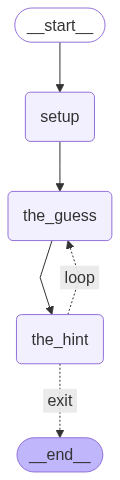

In [57]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [58]:
result = app.invoke({"name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})

Welcome Student I am thinking of a number between 1 and 20
The number is lower than 16
entering loop:  1
The number is higher than 2
entering loop:  2
The number is higher than 5
entering loop:  3
The number is lower than 11
entering loop:  4
Congratulations Student you guessed the number 7 in 5 attempts
